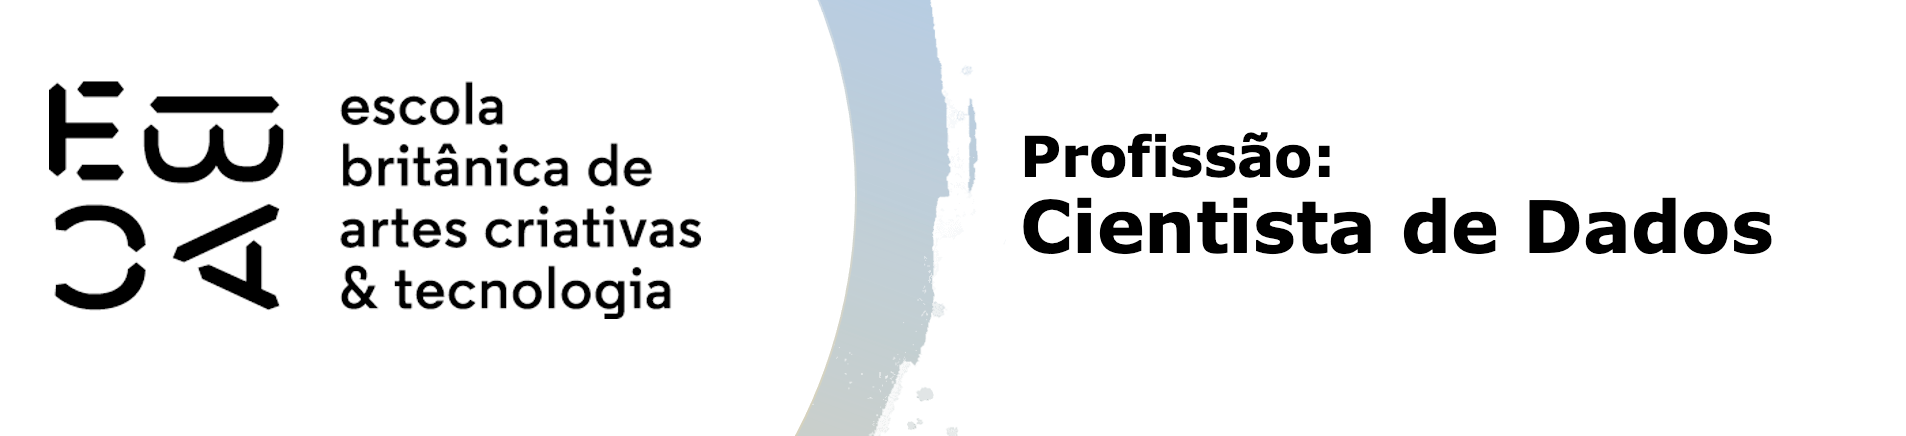

# Tarefa

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página o da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [63]:
df = pd.read_csv('online_shoppers_intention.csv')

In [64]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [65]:
# Checking columns
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [66]:
# Criando um novo df com as colunas que serão relevantes

df2 = df[['Administrative', 'Administrative_Duration', 'Informational', 
          'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']]

In [67]:
# Verificando tipo de dados
df2.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
dtype: object

In [68]:
# Verificando valores ausentes 
df2.isnull().sum()
 


Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

In [69]:
# Analisando estatísticas descritivas
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.0000,1.000000,4.000000,27.00000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.0000,7.500000,93.256250,3398.75000
Informational,12330.0,0.503569,1.270156,0.0,0.0000,0.000000,0.000000,24.00000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.0000,0.000000,0.000000,2549.37500
ProductRelated,12330.0,31.731468,44.475503,0.0,7.0000,18.000000,38.000000,705.00000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.1375,598.936905,1464.157214,63973.52223


In [70]:
df.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

**Obs:** Antes de continuarmos, faremos a normalização dos dados visto que nosso dataset possui escalas muito diferentes na distribuição dos dados

In [71]:
scaler = StandardScaler()
df2_scaled= scaler.fit_transform(df2)

# Convertendo o array de volta para um DataFrame para fácil manipulação
df2_scaled = pd.DataFrame(df2_scaled, columns=df2.columns)

# Exibir as primeiras linhas do DataFrame normalizado para revisão
print(df2_scaled.head())


   Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  
0               -0.244931       -0.691003                -0.624348  
1               -0.244931       -0.668518                -0.590903  
2               -0.244931       -0.691003                -0.624348  
3               -0.244931       -0.668518                -0.622954  
4               -0.244931       -0.488636                -0.296430  


## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

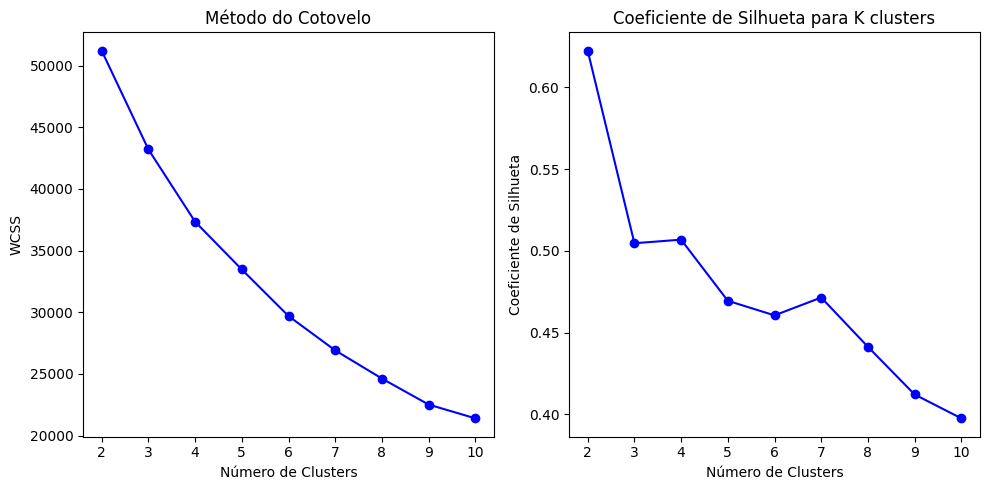

In [72]:
# Chosing the best number of clusters
wcss = []
silhouette_scores = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df2_scaled)
    wcss.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df2_scaled, kmeans.labels_))

# Plot do Método do Cotovelo
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K, wcss, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.title('Método do Cotovelo')

# Plot do Coeficiente de Silhueta
plt.subplot(1, 2, 2)
plt.plot(K, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Coeficiente de Silhueta para K clusters')

plt.tight_layout()
plt.show()

**Obs:** Ao analisar os gráficos o método do cotovelo não fornece um ponto de inflexão claro, o que torna a decisão mais difícil. No entanto, o coeficiente de silhueta apresenta 2 clusters como ideal, porém este parece não ser um número ideal para o problema de negócio. Uma opção interessante são 4 clusters conforme sugerindo na segunda sequência de exibição do gráfico.

In [73]:
# Aplicando o KMeans com 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df2_scaled)

# Verificar a quantidade de pontos em cada cluster
print(df['Cluster'].value_counts())

# Analisar a distribuição de 'Revenue' por cluster
cluster_revenue_distribution = pd.crosstab(df['Cluster'], df['Revenue'])

# Exibir a distribuição de 'Revenue' em cada cluster
print(cluster_revenue_distribution)

Cluster
2    9218
0    2285
1     577
3     250
Name: count, dtype: int64
Revenue  False  True 
Cluster              
0         1764    521
1          423    154
2         8072   1146
3          163     87


**Obs:** Embora 4 clusters parece interessante, observamos uma quantidade pequena de observações nos clusters 1 e 3, assim, trataremos mais nossos dados com outras abordagens. 

In [74]:
# Aplicar PCA para reduzir os dados a 2 dimensões
pca = PCA(n_components=2)
componentes = pca.fit_transform(df2_scaled)

### Biplot para verificarmos a distriuição e intersecção dos clusters

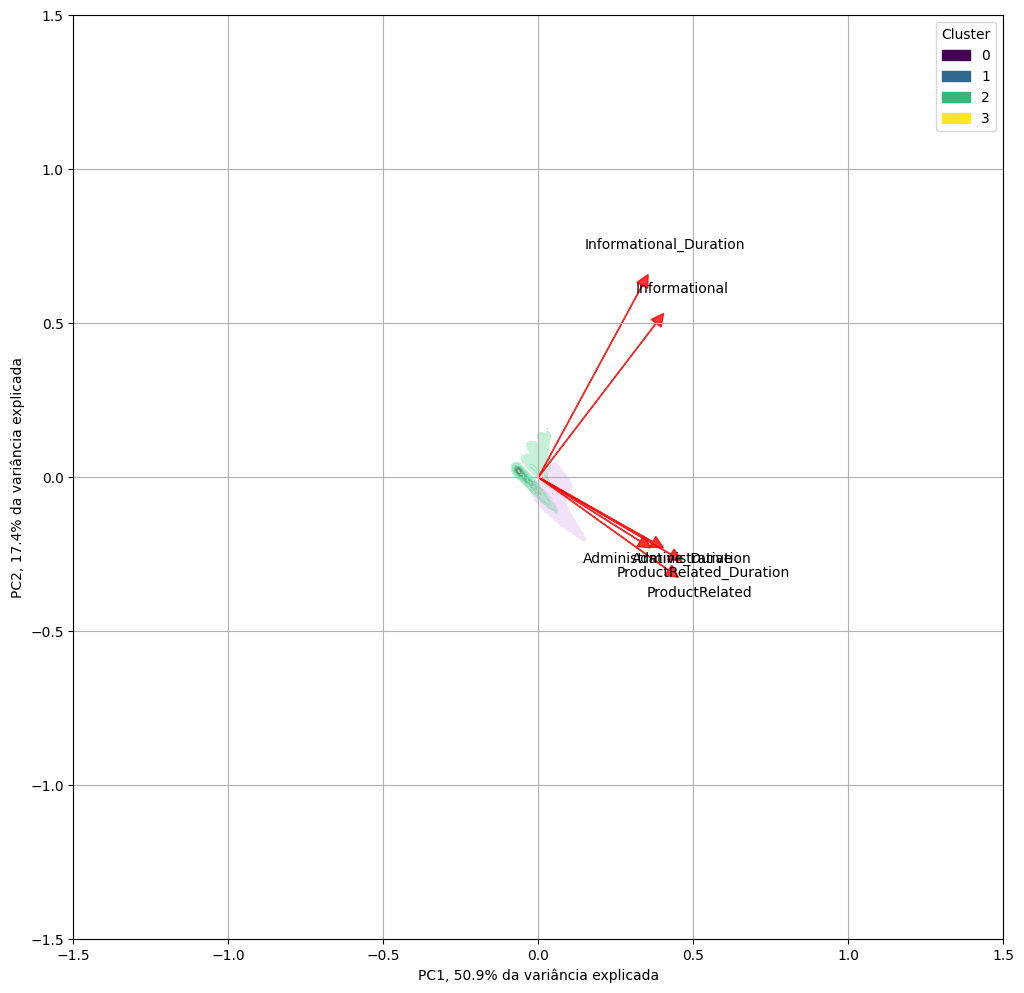

In [75]:
def biplot(score, coeff, y, labels=None):
    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 2 / (xs.max() - xs.min())
    scaley = 2 / (ys.max() - ys.min())

    fig, ax = plt.subplots(figsize=(12, 12))  # Aumentando o tamanho do gráfico
    sns.kdeplot(x=xs * scalex, y=ys * scaley, hue=y, ax=ax, fill=True, alpha=.4, palette='viridis')  # Reduzindo a opacidade

    for i in range(n):
        ax.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='r', alpha=0.8,  # Aumentando a opacidade das setas
                 length_includes_head=True, head_width=0.04, head_length=0.04)
        if labels is None:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Var" + str(i + 1), color='k', ha='center', va='center')
        else:
            ax.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color='k', ha='center', va='center')

    ax.set_xlim(-1.5, 1.5)  # Ajustando o limite dos eixos para ampliar a visualização
    ax.set_ylim(-1.5, 1.5)
    ax.set_xlabel("PC{0}, {1:.1%} da variância explicada".format(1, pca.explained_variance_ratio_[0]))
    ax.set_ylabel("PC{0}, {1:.1%} da variância explicada".format(2, pca.explained_variance_ratio_[1]))
    ax.grid()

# Usar o biplot para visualizar os clusters
biplot(componentes, np.transpose(pca.components_[0:2, :]), df['Cluster'], labels=df2.columns)
plt.show()


Com base no gráfico: a intersecção entre os clusters está muito grande, além disso, os vetores apontam praticamente para duas direções. Isso quer dizer que para uma melhor distinção entre os grupos, como demonstrado pelo método de cotovelo, apenas 2 cluster é o número ideal para termos uma divisão próxima a ótimo para este caso.

Cluster_2
0    10578
1     1752
Name: count, dtype: int64
Revenue    False  True 
Cluster_2              
0           9149   1429
1           1273    479


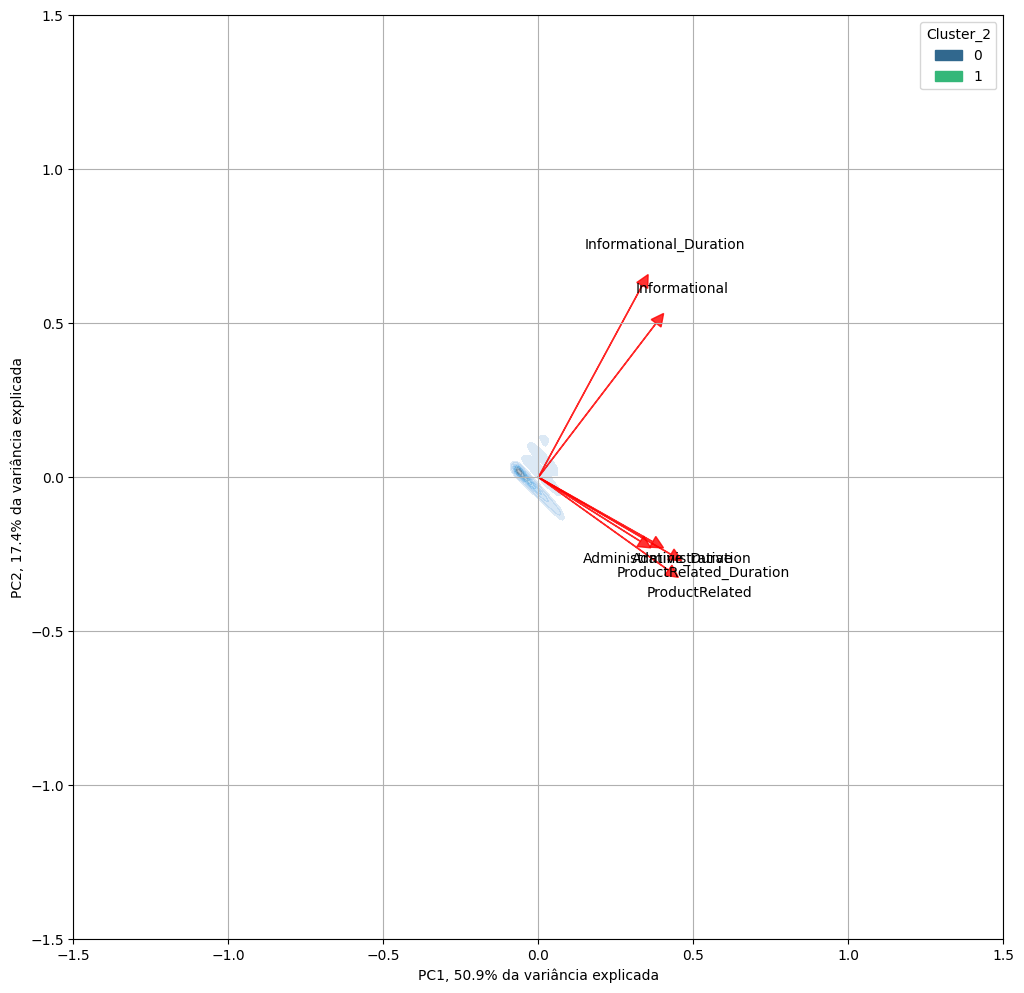

In [76]:
# Aplicando KMeans com 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42)
df['Cluster_2'] = kmeans_2.fit_predict(df2_scaled)

# Verificar a quantidade de pontos em cada cluster
print(df['Cluster_2'].value_counts())

# Analisar a distribuição de 'Revenue' por cluster
cluster_revenue_distribution_2 = pd.crosstab(df['Cluster_2'], df['Revenue'])
print(cluster_revenue_distribution_2)

# Aplicar PCA novamente para visualizar os clusters
pca_2 = PCA(n_components=2)
pca_components_2 = pca_2.fit_transform(df2_scaled)

# Biplot para os 2 clusters
biplot(pca_components_2, np.transpose(pca_2.components_[0:2, :]), df['Cluster_2'], labels=df2.columns)
plt.show()


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

In [77]:
# Analisando a média de Bounce Rate por Cluster
bounce_rate_mean = df.groupby('Cluster_2')['BounceRates'].mean()

# Analisando a proporção de Revenue por Cluster (já realizado anteriormente)
cluster_revenue_distribution_2 = pd.crosstab(df['Cluster_2'], df['Revenue'])

# Exibindo os resultados
print("Média de Bounce Rate por Cluster:\n", bounce_rate_mean)
print("\nDistribuição de Revenue por Cluster:\n", cluster_revenue_distribution_2)


Média de Bounce Rate por Cluster:
 Cluster_2
0    0.024793
1    0.006483
Name: BounceRates, dtype: float64

Distribuição de Revenue por Cluster:
 Revenue    False  True 
Cluster_2              
0           9149   1429
1           1273    479


In [78]:
# Criar um dicionário com os novos nomes dos clusters
cluster_names = {0: 'Exploradores', 1: 'Decididos'}

# Mapear os valores do cluster para os novos nomes
df['Cluster_2_Nomeado'] = df['Cluster_2'].map(cluster_names)

# Verificar os primeiros registros para confirmar a mudança
print(df[['Cluster_2', 'Cluster_2_Nomeado']].head())  



   Cluster_2 Cluster_2_Nomeado
0          0      Exploradores
1          0      Exploradores
2          0      Exploradores
3          0      Exploradores
4          0      Exploradores


In [79]:
# Remover as colunas 'Cluster' e 'Cluster_2'
df.drop(columns=['Cluster', 'Cluster_2'], inplace=True)

# Renomear a coluna 'Cluster_2_Nomeado' para 'Cluster'
df.rename(columns={'Cluster_2_Nomeado': 'Cluster'}, inplace=True)

# Verificar as mudanças
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [80]:
# Contagem de valores únicos na coluna 'Cluster'
print(df['Cluster'].value_counts())


Cluster
Exploradores    10578
Decididos        1752
Name: count, dtype: int64


### Avaliação de Resultados

#### Análise das Variáveis Fora do Escopo: *Bounce Rate* e *Revenue*

##### Bounce Rate
- **Bounce Rate** indica a proporção de visitantes que saem do site após visitar apenas uma página, sem interagir com outras partes do site.
- A média do Bounce Rate em cada cluster é a seguinte:
  - **Exploradores (Cluster 0)**: 0.0248
  - **Decididos (Cluster 1)**: 0.0065
  
  Um Bounce Rate mais baixo no grupo **Decididos** sugere que os usuários nesse grupo estão mais engajados com o site.

##### Revenue
- **Revenue** indica se uma sessão resultou em compra (True) ou não (False).
- A distribuição de Revenue por cluster é a seguinte:
  - **Exploradores (Cluster 0)**:
    - **Revenue=False**: 9.149 sessões
    - **Revenue=True**: 1.429 sessões
  - **Decididos (Cluster 1)**:
    - **Revenue=False**: 1.273 sessões
    - **Revenue=True**: 479 sessões
  
  O grupo **Decididos** possui uma proporção maior de sessões que resultaram em compra em comparação com os **Exploradores**, indicando que os usuários deste grupo têm uma maior propensão à compra.

#### Conclusão
- **Exploradores (Cluster 0)**:
  - **Bounce Rate**: Maior, indicando menor engajamento.
  - **Revenue**: Menor proporção de compras, indicando menor propensão à compra.
- **Decididos (Cluster 1)**:
  - **Bounce Rate**: Menor, indicando maior engajamento.
  - **Revenue**: Maior proporção de compras, indicando maior propensão à compra.

Esses insights indicam que os **Decididos** são usuários mais propensos à compra e mais engajados com o site, enquanto os **Exploradores** incluem a maioria dos usuários, mas com menor engajamento e propensão à compra.
